In [5]:
# For data
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from __future__ import division

In [6]:
# Use to grab data from the web(HTTP capabilities)
import requests

# We'll also use StringIO to work with the csv file, the DataFrame will require a .read() method
from StringIO import StringIO

In [7]:
# This is the url link for the poll data in csv form
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

# Use requests to get the information in text form
source = requests.get(url).text

# Use StringIO to avoid an IO error with pandas
poll_data = StringIO(source) 

In [8]:
# Set poll data as pandas DataFrame
poll_df = pd.read_csv(poll_data)

# Let's get a glimpse at the data
poll_df.info()

CParserError: Error tokenizing data. C error: Expected 1 fields in line 7, saw 5


In [9]:
poll_df.head()

NameError: name 'poll_df' is not defined

In [10]:
sns.factorplot('Affiliation',data=poll_df, hue  = 'Population', kind = 'count')

NameError: name 'poll_df' is not defined

In [13]:
avg = pd.DataFrame(poll_df.mean())
avg.drop('Number of Observations', axis = 0, inplace = True)

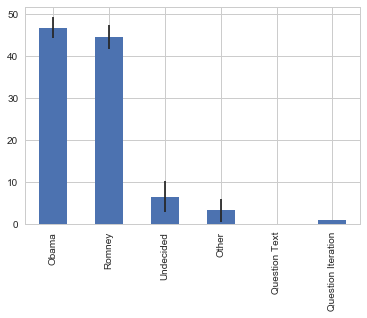

In [16]:
std = pd.DataFrame(poll_df.std())
std.drop('Number of Observations',axis=0,inplace=True)
avg.plot(yerr=std,kind='bar',legend=False)

In [17]:
poll_avg = pd.concat([avg,std], axis = 1)
poll_avg.columns=["Avarage","STD"]
poll_avg

,Avarage,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726
Question Text,NaN,NaN
Question Iteration,1.000000,0.000000


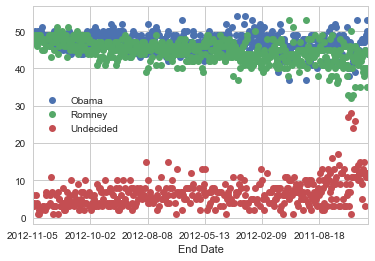

In [18]:
poll_df.plot(x='End Date',y=['Obama','Romney','Undecided'],marker='o',linestyle='')